# Introducción a Qiskit

Vamos a ver muy por encima cómo trabajar con Qiskit. El paquete principal es Terra, que nos proporciona los bloques básicos necesarios para programar ordenadores cuánticos. La unidad fundamental de Qiskit es el objeto `QuantumCircuit`. 

El flujo de trabajo típico usando Qiskit tiene tres etapas:

- **Construcción**. Hacemos diferentes circuitos cuánticos que representan el problema que estamos tratando de resolver.
- **Ejecución**. Ejecutamos estos circuitos en diferentes backends/simuladores.
- **Postprocesado**. Una vez ejecutados los distintos "jobs", se obtienen los resultados y se hace un postprocesado dependiendo del output deseado.

![](images/Slide1.png)

## Cicuitos <a name='basics'></a>


### Construyendo el circuito

Vamos a empezar creando un `QuantumCircuit` de 2 qubits.

In [7]:
# circuito de 2 qubits
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

Ahora que hemos inicializado el circuito, podemos usar puertas (operaciones) para empezar a manipular los qubits. Por supuesto existen múltiples puertas y circuitos, pero vamos a empezar viendo el ejemplo de un circuito que genera un estado de Bell.

$$|\psi\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)$$

Por defecto, cada qubit empieza inicializado a $|0\rangle$. Para llegar al estado de Bell, aplicamos las siguientes puertas lógicas:

**1.** Una puerta Hadamard $H$ en el qubit $q_{0}$ , que lo pone en estado de **superposición** $\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$.

**2.** Una C-Not ($C_{X}$) entre los qubits $q_{0}$ y $q_{1}$.


En un ordenador ideal, el estado producido al ejecutar este circuito, sería el estado de Bell.

En Qiskit, añadimos las operaciones una a una.

> **_NOTA:_** Este estado es uno de los que forman la base de Bell. Un conjunto de estados para un sistema de dos qubits que describen situaciones de entralazamiento máximo (el valor de un qubit determina completamente el valor del otro)

In [8]:
qc.h(0)
qc.cx(0, 1)

qc.measure_all()

### Visualizando el circuito <a name='visualize'></a>

Para visualizar un circuito usamos `QuantumCircuit.draw()`, que muestra los circuitos como se suelen representar en los libros de texto.

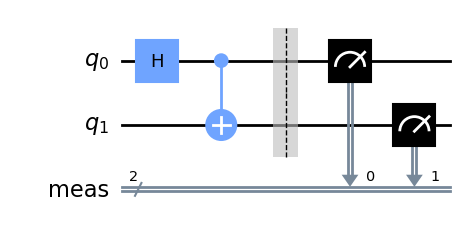

In [9]:
qc.draw('mpl') #formato del gráfico. (mpl: imágenes con color renderizadas puramente en python usando matplotlib)

### Ejecutando el circuito <a name='run'></a>

Ahora que ya hemos definido nuestro circuito, es momento de compilarlo y ejecutarlo. En Qiskit esto se hace aplicando el método `run`, que devuelve un objeto que encapsula información acerca de la tarea ejecutada, llamado `job`.

In [10]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [11]:
job = sampler.run(qc)
result = job.result()

{'00': 0.4999999999999999, '11': 0.4999999999999999}


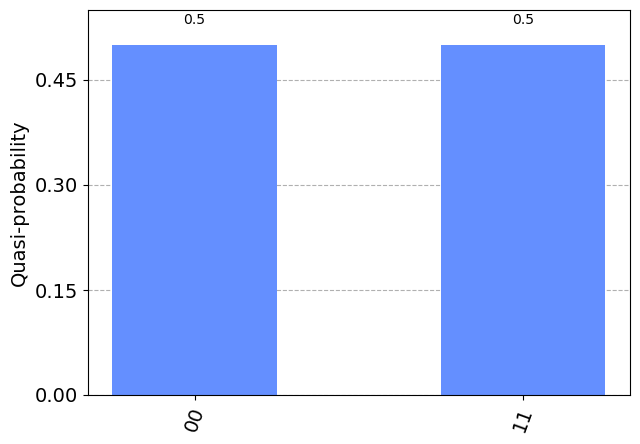

In [12]:
from qiskit.visualization import plot_histogram
distribution = result.quasi_dists

binary_dist = distribution[0].binary_probabilities()
print(binary_dist)
plot_histogram(binary_dist)

## Primitives

Las "primitives" son funciones ensenciales que facilitan la construcción de algoritmos y aplicaciones modulares. 

En lugar de simplemente devolver cuentas, devuelven infromación más significativa.

Además, proporcionan una forma sencilla de acceder a los últimos avances de IBM Quantum en cuanto a hardware y software.

Un buen ejemplo de lo que es una primitiva en otro contexto son los tipos de datos primitivos. 

Según el lenguaje de programación que escojas, tendrás tipos de datos que son generalmente indivisibles y estos se usan para construir otros tipos de datos más complejos, según cómo elijas utilizarlos. 

Por ejemplo: int, float, string y boolean son generalmente considerados los tipos primitivos de datos en python, mientras que un array de strings, una lista de nombres, una tupla de coordenadas decimales o un conjunto de integers son tipos de datos no primitivos, construidos a partir de los datos primitivos.

Las dos primitivas básicas que vamos a ver son:

**Sampler:** Genera probabilidades a partir de los circuitos que recibe.

**Estimator:** Calcula el valor esperado de observables.

![](images/image-asset.png)

## Usando Sampler y Estimator

En Qiskit, para ejecutar un job, la sintaxis típica es `backend.run(circuito)`. Existe una clase llamada `Sampler` que estandariza la forma en que los usuarios interactúan con todas sus implementaciones.

De una manera similar, tenemos la clase `Estimator`.

Vamos a ver cómo sería un flujo de ejecución típico con `Estimator`.

#### Ejemplo 1 : Circuito de un solo qubit

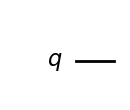

In [13]:
qc = QuantumCircuit(1)
qc.draw('mpl')

Para usar `Estimator`, es necesario definir un observable. Este observable viene determinado por la característica que queramos estimar de nuestro sistema. 

> **_NOTA:_** Así como podemos definir el estado de un coche usando propiedades físicas como la velocidad o la aceleración, podemos describir el estado de un sistema cuántico usando observables, que son objetos matemáticos. En mecánica cuántica, los estados se representan por vectores columna complejos normalizados, o kets ($|\psi\rangle $), y los observables son operadores lineales hermíticos $\hat{H}=\hat{H}^{\dagger}$ que actúan sobre los kets.

Valor esperado: 1.0


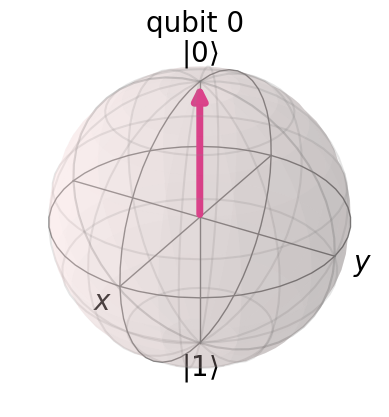

In [14]:
from qiskit.quantum_info import SparsePauliOp

#En que punto del eje Z estará más veces la representación del statevector
observable = SparsePauliOp("Z")

from qiskit.primitives import Estimator
estimator = Estimator()

job = estimator.run(qc, observable)
result = job.result()
print(f'Valor esperado: {result.values[0]}')

from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

sv = Statevector(qc)
plot_bloch_multivector(sv)

#### Ejemplo 2: un qubit y puerta X

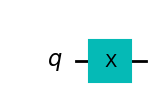

In [15]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

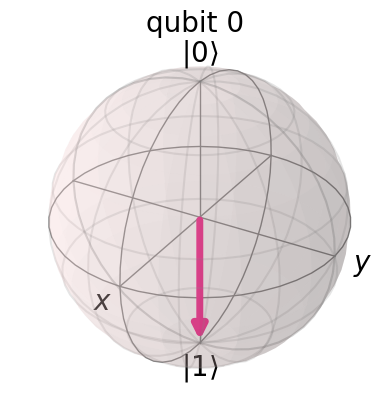

In [16]:
sv = Statevector(qc)
plot_bloch_multivector(sv)

In [17]:
observable = SparsePauliOp("Z")

estimator = Estimator()

job = estimator.run(qc, observable)
result = job.result()
print(f'Valor esperado: {result.values[0]}')

Valor esperado: -1.0


#### Ejemplo 3: un qubit y puerta Hadamard

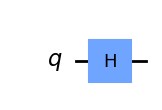

In [18]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

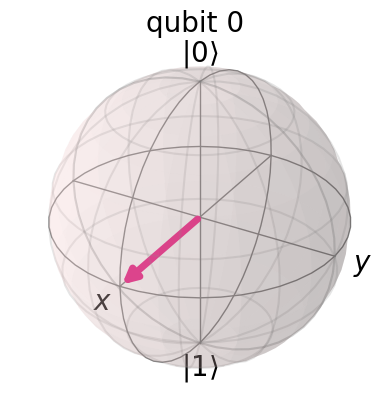

In [19]:
sv = Statevector(qc)
plot_bloch_multivector(sv)

In [20]:
observable = SparsePauliOp("Z")

estimator = Estimator()

job = estimator.run(qc, observable)
result = job.result()
print(f'Valor esperado: {result.values[0]}')

Valor esperado: 0.0


## VQE

El algoritmo de "Resolución Cuántica Variacional de Autovalores" o en inglés _**Variational Quantum Eigensolver (VQE)**_, es una rutina de optimización para encontrar el estado fundamental (el autovalor más pequeño) del Hamiltoniano, y se puede ejecutar en el hardware cuántico actual. 


![](images/Presentation1.png)

A continuación, vamos a usar Estimator para calcular la energía del estado fundamental de una molécula de Hidógeno (H2).

## Ejemplo molécula $H_2$

Como dato de referencia, tenemos [este estudio](https://cccbdb.nist.gov/energy3x.asp?method=1&basis=20&charge=0) de la **_Computational Chemistry Comparison and Benchmark DataBase_** o **_CCCBD_**, que nos dice que la energía electrónica experimental es $-1.117506 \text{ Ha}$, que restada la energía de repulsión del nucleo $0.742983 \text{ Ha}$ nos da $-1.860489 \text{ Ha}$. Este es el resultado que esperamos obtener con nuestro algoritmo de VQE.

![](images/H2_energy.png)

>**NOTA:** Un Hartree (Ha) es la unidad atómica de energía. $(1 \text{ Ha} = 27,2114 \text{ eV} )$

Primero, definimos el observable. Vamos a coger un set de Paulis que originalmente se obtuvieron usando Qiskit Nature para la molécula de H2, usando la clase `SparsePauliOp`.

In [21]:
observable_H2 = SparsePauliOp.from_list(
    [
        ("II", -1.052373245772859),
        ("IZ", 0.39793742484318045),
        ("ZI", -0.39793742484318045),
        ("ZZ", -0.01128010425623538),
        ("XX", 0.18093119978423156),
    ]
)

print(f"Número de qubits necesarios para codificarlo: {observable_H2.num_qubits}")

Número de qubits necesarios para codificarlo: 2


A continuación, vamos a definir el `ansatz`,otro requisito para VQE. Este tipo de algoritmos consisten en explorar y comparar un rango de estados cuánticos que dependan de un conjunto finito de parámetros. Estos estados se pueden recoger a través de un circuito parametrizado, que representa un conjunto de variaciones sobre un estado de referencia.

El `ansatz` es el conjunto de ese estado de referencia y las variaciones que se aplican sobre el mismo.


>**NOTA:** ansatz viene del alemán y significa "intento" o "aproximación".

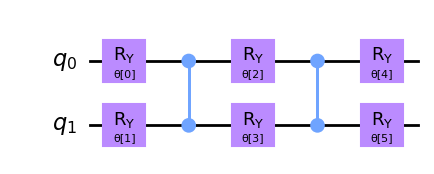

In [22]:
from qiskit.circuit.library import TwoLocal

ansatz = TwoLocal(2,rotation_blocks="ry", entanglement_blocks="cz", reps=2)
ansatz.decompose().draw("mpl")


`TwoLocal()` es una clase que genera un circuito parametrizado compuesto por capas alternantes de rotación y entrelazamiento. Las capas de rotación se componen de puertas de un solo qubit que se aplican sobre todos los qubits del circuito, mientras que las de entrelazamiento se aplican sobre dos o más qubits.

Las puertas elegidas, así cómo el número de capas o las puertas de entrelazamiento se han determinado de forma completamente heurística.

In [23]:
# definimos función callback, para graficar la ejecución de VQE
counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

A continuación, importamos la clase `VQE()`e introducimos el estimator, el ansatz, la función de callback y el optimizador escogido, que en este caso, es `SPSA`.

In [24]:
import numpy as np
from qiskit.algorithms.optimizers import SPSA
from qiskit.algorithms.minimum_eigensolvers import VQE

estimator = Estimator()
optimizer = SPSA() 
vqe = VQE(estimator, ansatz, optimizer,callback=store_intermediate_result,initial_point=np.ones(ansatz.num_parameters)) #el initial_point se ha determinado de manera heurística

In [25]:
#visualización de resultados
result = vqe.compute_minimum_eigenvalue(observable_H2)
print(result) 

{   'aux_operators_evaluated': None,
    'cost_function_evals': 200,
    'eigenvalue': -1.8572736477696419,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7fdbf44f3430>,
    'optimal_parameters': {   ParameterVectorElement(θ[5]): 0.28245085814108545,
                              ParameterVectorElement(θ[1]): -0.13688556133357466,
                              ParameterVectorElement(θ[0]): 1.7303191728278233,
                              ParameterVectorElement(θ[2]): 1.7275986187114505,
                              ParameterVectorElement(θ[3]): 0.31014271374647595,
                              ParameterVectorElement(θ[4]): -0.26318054010793257},
    'optimal_point': array([ 1.73031917, -0.13688556,  1.72759862,  0.31014271, -0.26318054,
        0.28245086]),
    'optimal_value': -1.8572736477696419,
    'optimizer_evals': None,
    'optimizer_result': <qiskit.algorithms.optimizers.optimizer.OptimizerResult object at 0x7fdbf4c32eb0>,
    'optimi

Text(0, 0.5, 'Energía (Ha)')

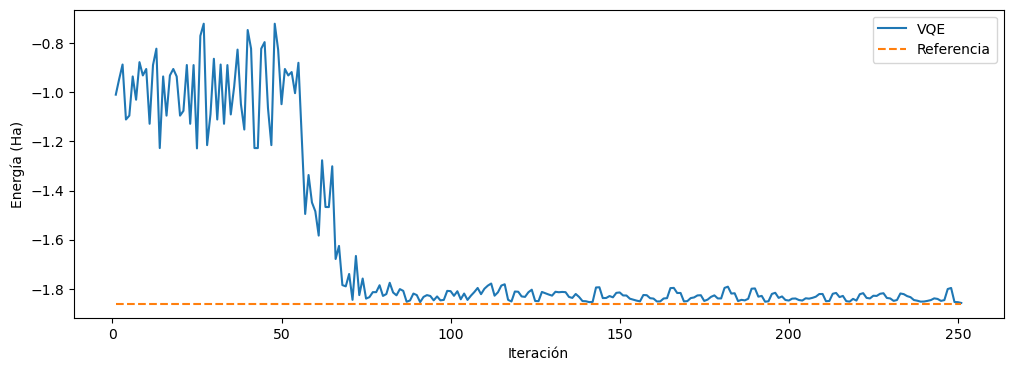

In [26]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts, values,label="VQE")
pylab.plot(counts,len(counts)*[-1.860489],"--",label="Referencia")
pylab.legend()
pylab.xlabel("Iteración")
pylab.ylabel("Energía (Ha)")

En la gráfica superior observamos como VQE acaba convergiendo a un valor $(-1.857269044678420 \text{ Ha})$ muy próximo a nuestro valor de referencia $(-1.860489\text{ Ha})$

## Runtime

![](images/Qiskit_Runtime_architecture.png)

`Qiskit Runtime` es un servicio y modelo de programación de la computación cuántica que permite a los usuarios optimizar flujos de trabajo y ejecutarlos eficientemente en sistemas cuánticos.